### Graph/Network Mining

In this notebook, we will use Facebook combined ego networks dataset. The dataset description is [here](https://snap.stanford.edu/data/egonets-Facebook.html). 

This network contains the aggregated network of ten individuals’ Facebook friends list. There are two columns in this file representing the nodes, and each row represents a link. 

Data Location: /dsa/data/DSA-8410/graph/facebook_combined.txt

### Environment Setup

In [13]:
import sys
import networkx as nx 
import matplotlib.pyplot as plt
import numpy as np
from networkx.algorithms.community.modularity_max import greedy_modularity_communities
from networkx.algorithms.community.lukes import lukes_partitioning
import pandas as pd
%matplotlib inline

### T1. Create the network

In [32]:
df = pd.read_csv('/dsa/data/DSA-8410/graph/facebook_combined.txt', header=None)
df

,0
0,0 1
1,0 2
2,0 3
3,0 4
4,0 5
...,...
88229,4026 4030
88230,4027 4031
88231,4027 4032
88232,4027 4038


In [39]:
df[[0, 1]] = df[0].str.split(' ',expand=True) # Data is printing two separate columns as a single column for some reason

In [40]:
df # Split into two separate columns

,0,1
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
88229,4026,4030
88230,4027,4031
88231,4027,4032
88232,4027,4038


In [48]:
g=nx.Graph()

g = nx.from_pandas_edgelist(df, 0, 1)

### T2: Show the number of eges and nodes

In [49]:
g.number_of_nodes()

4039

In [50]:
g.number_of_edges()

88234

### T3. Show min, max, and avg degress for this network

In [51]:
deg = g.degree()

In [52]:
min(deg, key=lambda x: x[1]) # min degree

('11', 1)

In [53]:
max(deg, key=lambda x: x[1]) # max degree

('107', 1045)

In [54]:
avg_degree = sum([d for n, d in deg]) / g.number_of_nodes()
avg_degree

43.69101262688784

### T4. Show a degree distrbution plot


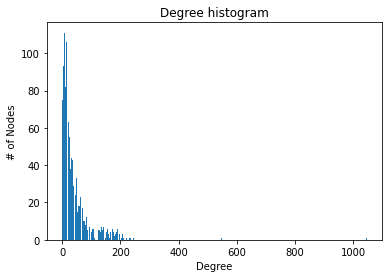

In [55]:
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)

plt.bar(*np.unique(degree_sequence, return_counts=True))
plt.title("Degree histogram")
plt.xlabel("Degree")
plt.ylabel("# of Nodes");

### T5. Print top-10 nodes in terms of high degree

In [56]:
sorted_degrees = sorted(deg, key=lambda x: x[1], reverse=True)
sorted_degrees[:10]

[('107', 1045),
 ('1684', 792),
 ('1912', 755),
 ('3437', 547),
 ('0', 347),
 ('2543', 294),
 ('2347', 291),
 ('1888', 254),
 ('1800', 245),
 ('1663', 235)]